In [1]:
import pandas as pd 

### Loading Dataset

In [3]:
df = pd.read_csv(
    "SMSSpamCollection",
    sep="\t",
    header=None,
    names=["Category", "Message"],
    encoding="latin-1"
)

In [4]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Data Exploration

In [7]:
df["Category"].value_counts()


Category
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
df["Category"].value_counts(normalize=True) * 100


Category
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

### Label Encoding

In [9]:
df["Label"] = df["Category"].map({"ham": 0, "spam": 1})


In [10]:
df.head()

,Category,Message,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Text Preprocessing 

In [13]:
import re
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stop_words = {
    "a","about","above","after","again","against","all","am","an","and",
    "any","are","as","at","be","because","been","before","being","below",
    "between","both","but","by","could","did","do","does","doing","down",
    "during","each","few","for","from","further","had","has","have","having",
    "he","her","here","hers","herself","him","himself","his","how","i",
    "if","in","into","is","it","its","itself","me","more","most","my",
    "myself","no","nor","not","of","off","on","once","only","or","other",
    "our","ours","ourselves","out","over","own","same","she","should",
    "so","some","such","than","that","the","their","theirs","them",
    "themselves","then","there","these","they","this","those","through",
    "to","too","under","until","up","very","was","we","were","what",
    "when","where","which","while","who","whom","why","with","you",
    "your","yours","yourself","yourselves"
}

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z]", " ", text)
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)


In [14]:
df["Processed_Message"] = df["Message"].apply(preprocess_text)


In [15]:
df[["Message", "Processed_Message"]].head()


,Message,Processed_Message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah don t think goe usf live around though


### Feature Extraction

In [16]:
# import tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer


In [17]:
tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df["Processed_Message"])
y = df["Label"]


In [18]:
print(X.shape)


(5572, 5000)


### Train test Split 

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [20]:
print(X_train.shape)
print(X_test.shape)


(4457, 5000)
(1115, 5000)


# Training model



## Multinomial Naive Bayes 

In [21]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# Model Evaluation

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [24]:
# Naïve Bayes predictions
y_pred_nb = nb_model.predict(X_test)

# Logistic Regression predictions
y_pred_lr = lr_model.predict(X_test)


## Evaluation of Naive Bayes 

In [26]:
print("Naïve Bayes Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1-score:", f1_score(y_test, y_pred_nb))


Naïve Bayes Performance
Accuracy: 0.9713004484304932
Precision: 0.9915966386554622
Recall: 0.7919463087248322
F1-score: 0.8805970149253731


### Evaluation of Logistic Regression

In [27]:
print("\nLogistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))



Logistic Regression Performance
Accuracy: 0.9668161434977578
Precision: 1.0
Recall: 0.7516778523489933
F1-score: 0.8582375478927203


In [28]:
print("\nClassification Report (Naïve Bayes)")
print(classification_report(y_test, y_pred_nb))

print("\nClassification Report (Logistic Regression)")
print(classification_report(y_test, y_pred_lr))



Classification Report (Naïve Bayes)
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Classification Report (Logistic Regression)
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



### Confusion matrix of Naive Bayes 

<Figure size 640x480 with 0 Axes>

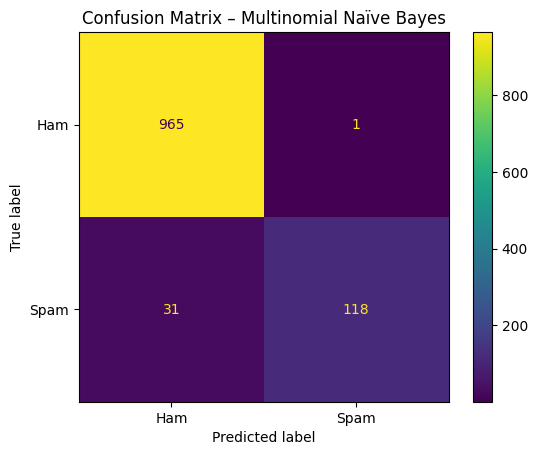

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_nb = confusion_matrix(y_test, y_pred_nb)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_nb,
    display_labels=["Ham", "Spam"]
)

plt.figure()
disp.plot()
plt.title("Confusion Matrix – Multinomial Naïve Bayes")
plt.show()


### ROC Curve

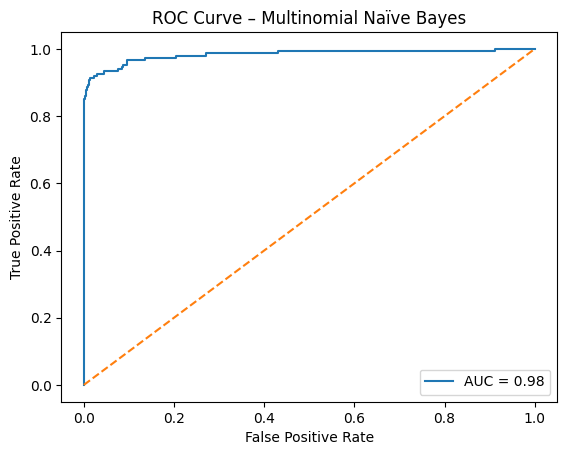

In [30]:
from sklearn.metrics import roc_curve, auc

y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob_nb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Multinomial Naïve Bayes")
plt.legend()
plt.show()


### Precision - Recall Curve

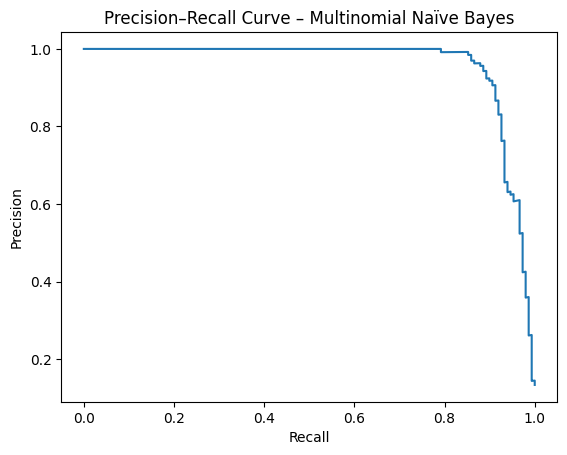

In [31]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob_nb)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Multinomial Naïve Bayes")
plt.show()


### Word cloud for spam messages 

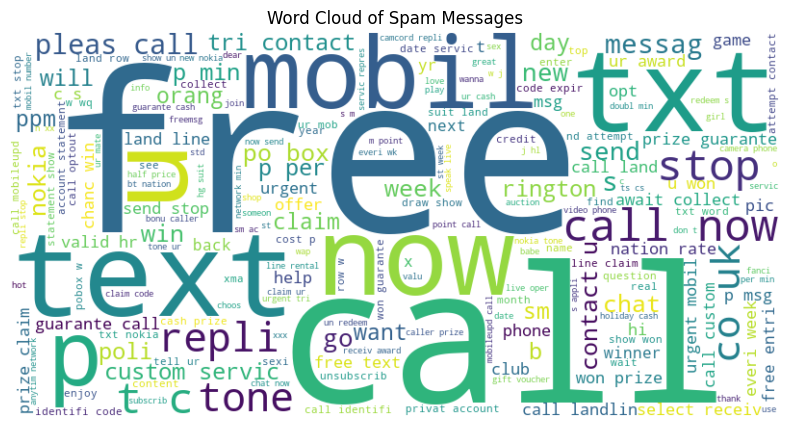

In [32]:
from wordcloud import WordCloud

spam_text = " ".join(df[df["Label"] == 1]["Processed_Message"])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(spam_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Spam Messages")
plt.show()


### Top features bar chart (Naive Bayes)

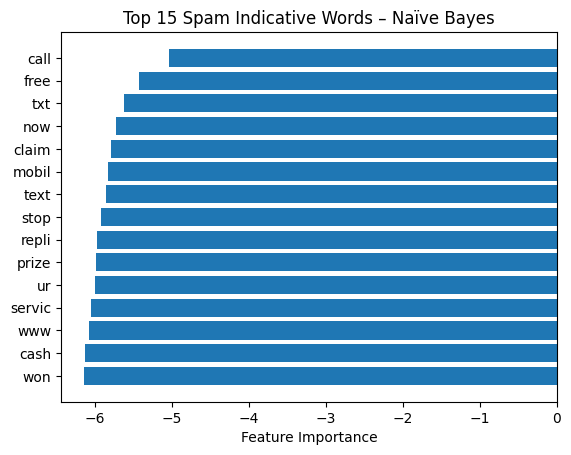

In [33]:
import numpy as np

feature_names = tfidf.get_feature_names_out()
top_indices = np.argsort(nb_model.feature_log_prob_[1])[-15:]

plt.figure()
plt.barh(
    [feature_names[i] for i in top_indices],
    nb_model.feature_log_prob_[1][top_indices]
)
plt.xlabel("Feature Importance")
plt.title("Top 15 Spam Indicative Words – Naïve Bayes")
plt.show()


### Confusion Matrix Logisitic Regression

<Figure size 640x480 with 0 Axes>

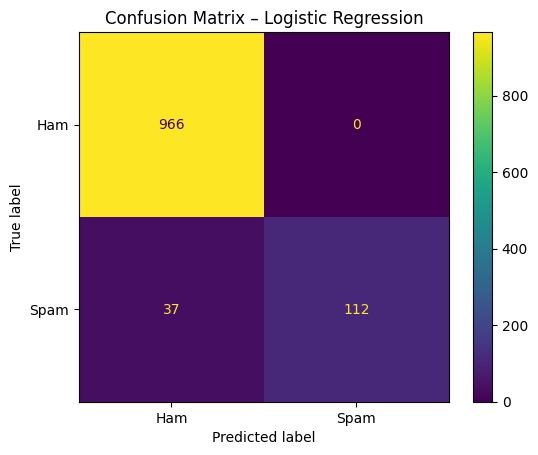

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_lr = confusion_matrix(y_test, y_pred_lr)

disp_lr = ConfusionMatrixDisplay(
    confusion_matrix=cm_lr,
    display_labels=["Ham", "Spam"]
)

plt.figure()
disp_lr.plot()
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


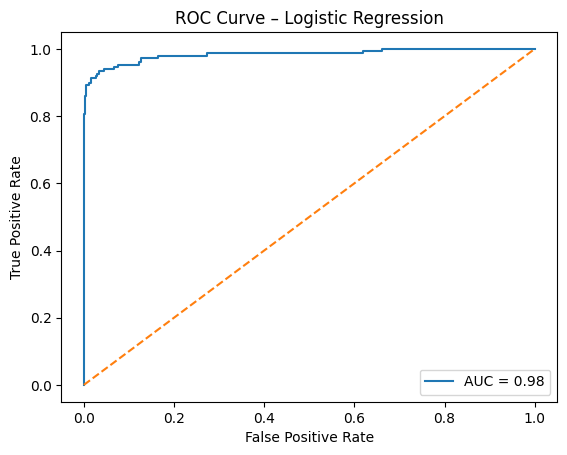

In [35]:
### ROC Curve (Logistic Regression)

from sklearn.metrics import roc_curve, auc

y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"AUC = {roc_auc_lr:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()





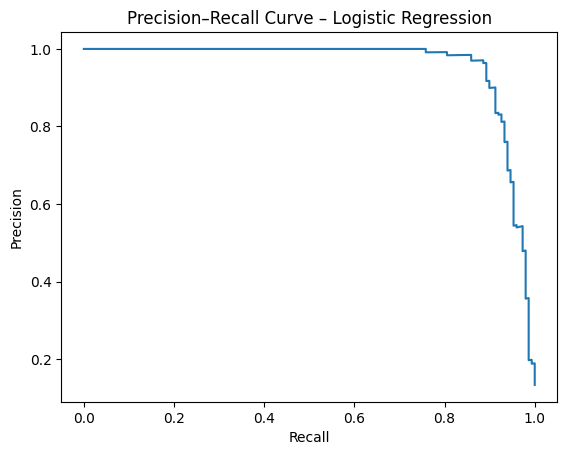

In [36]:
### Precision Recall Curve (Logistic Regression)

from sklearn.metrics import precision_recall_curve

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)

plt.figure()
plt.plot(recall_lr, precision_lr)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Logistic Regression")
plt.show()


### Top features Logistic Regression

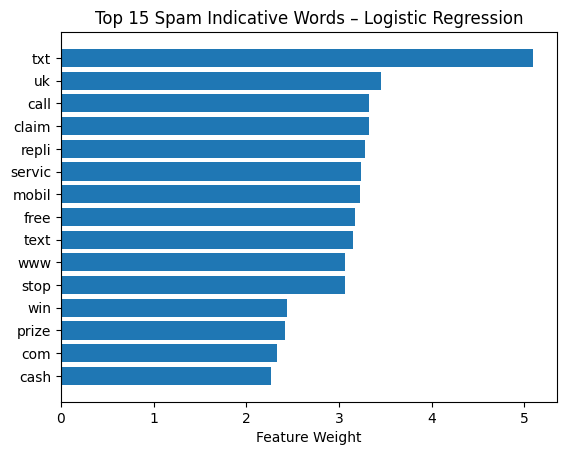

In [37]:
import numpy as np

feature_names = tfidf.get_feature_names_out()

coef = lr_model.coef_[0]
top_positive = np.argsort(coef)[-15:]

plt.figure()
plt.barh(
    [feature_names[i] for i in top_positive],
    coef[top_positive]
)
plt.xlabel("Feature Weight")
plt.title("Top 15 Spam Indicative Words – Logistic Regression")
plt.show()


### Model Performance Evaluation (Bar Chart)
